In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [11, 5]

In [3]:
df_can = pd.read_excel("Canada.xlsx", sheet_name='Canada by Citizenship', engine='openpyxl', 
                       skiprows=range(20))

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Not interested in most of these values.
## Coverage we know almost all immigrants are foreigners from these countries. 

## As these are all immigrants then Type can also be dropped.

## Looking at AREA we can tell this is just the code for the continents of AreaName.

## DEV and DevName are for developing or developed, don't need 2 inidcators for this

In [5]:
df_can = df_can.drop(["Type", "Coverage", "AREA", "REG", "DEV"], axis=1)

## Quite a few NaN's were read in this file, so removal would tidy up the data a bit
## There is an unknown country? And a world view isn't necessary right now

In [6]:
df_can.dropna(axis=0, how='all', inplace=True)
df_can.dropna(axis=1, how='all', inplace=True)

## Column names don't entirely make sense, minor changes for more understanding. 

## Mainly changing OdName, AreaName and DevName. These are ambiguous and can be interpreted differently.

In [7]:
df_can = df_can.rename(columns={"OdName": "Country", "AreaName" : "Continent", "DevName" : "DevLvl"})
df_can = df_can.set_index("Country")
df_can.drop(["Total", "Unknown"])

,Continent,RegName,DevLvl,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191.0,1829.0,2162.0,3404.0,7583.0,5907.0,2741.0,...,1816.0,1852.0,3153.0,2574.0,1784.0,2171.0,1942.0,1723.0,1731.0,2112.0
Western Sahara,Africa,Northern Africa,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,Asia,Western Asia,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,...,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0


In [8]:
years = list(range(1980,2014))
df_can["Total"] = df_can[years].sum(axis=1)

In [9]:
df_can.tail()

,Continent,RegName,DevLvl,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Yemen,Asia,Western Asia,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,...,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0,2985.0
Zambia,Africa,Eastern Africa,Developing regions,11.0,17.0,11.0,7.0,16.0,9.0,15.0,...,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0,1677.0
Zimbabwe,Africa,Eastern Africa,Developing regions,72.0,114.0,102.0,44.0,32.0,29.0,43.0,...,615.0,454.0,663.0,611.0,508.0,494.0,434.0,437.0,407.0,8598.0
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Total,World,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6924212.0


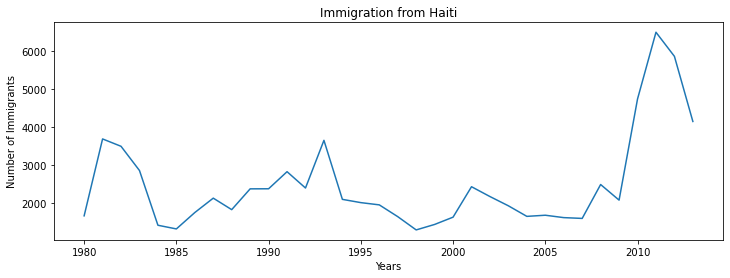

In [23]:
df_can.loc['Haiti', years].plot(kind='line')
plt.title("Immigration from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

# A simple line plot connecting the markers of immigrants from Haiti to Canada

In [11]:
df_can.sort_values(["Total"], ascending = False, axis = 0, inplace = True)
df_can = df_can.drop(["Total", "Unknown"])

In [12]:
df_can.head()

,Continent,RegName,DevLvl,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


## So at the top we can see the top 5 countries of people who have immigrated to Canada.

In [13]:
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()

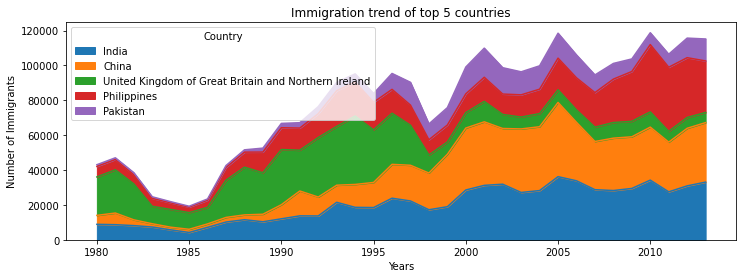

In [24]:
df_top5.plot(kind="area")

plt.title("Immigration trend of top 5 countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

## From the above area graph we can see that China and India alone are withholding approximately 50% of all immigrations to Canada from around 2000 onwards.

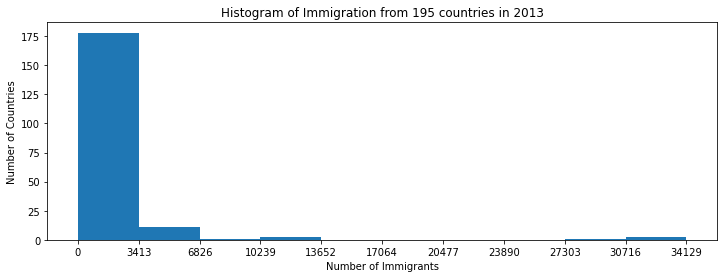

In [25]:
count, bin_edges = np.histogram(df_can[2013])

(df_can[2013].plot(kind='hist', xticks = bin_edges))

plt.title("Histogram of Immigration from 195 countries in 2013")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

plt.show()

## In 2013, we can see majority of countries weren't exactly immmigrating to Canada, majority were within the first block of 3413. We notice outliers from 27303 - 34129. 

## Now for analysis, we will choose an random country, such as Iceland

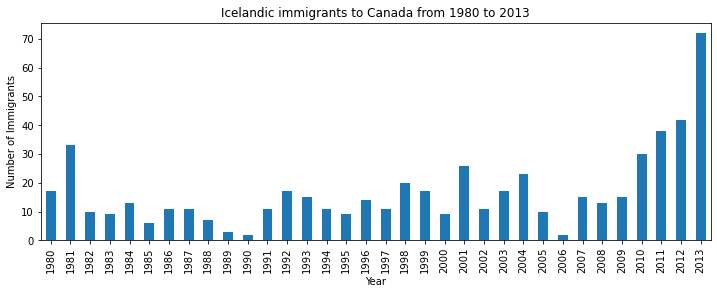

In [26]:
df_iceland = df_can.loc['Iceland', years]

df_iceland.plot(kind='bar')

plt.title("Icelandic immigrants to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()

## Right away we can see that residents of Iceland 

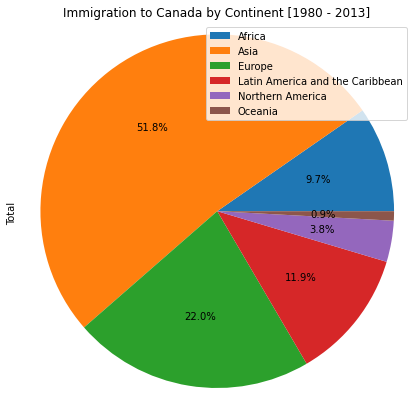

In [36]:
df_continents = df_can.groupby("Continent", axis = 0).sum()
df_continents["Total"].plot(kind='pie', figsize=(7,7), autopct="%1.1f%%", labels=None)

plt.title("Immigration to Canada by Continent [1980 - 2013]")

plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper right')

plt.show()

## Now we can clearly see that the area graph above noted the same above with just the top 5 countries of India and China representing just above 50% of all income immigrants. However in conjunction with all other countries, we can still see that 50% of all immigrants come from Asia, particularly China and India.